# Introduction to Linear Regression

Linear regression is a powerful modeling technique that can be used to understand the relationship between a quantitative variable and one or more other variables, sometimes with the goal of making predictions. For example, linear regression can help us answer questions like:

* What is the relationship between apartment size and rental price for NYC apartments?
* Is a mother’s height a good predictor of their child’s adult height?

The first step before fitting a linear regression model is exploratory data analysis and data visualization: is there a relationship that we can model? For example, suppose we collect heights (in cm) and weights (in kg) for 9 adults and inspect a plot of height vs. weight:

```python
#import matplotlib.pyplot as plt
plt.scatter(data.height, data.weight)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()
```

When we look at this plot, we see that there is some evidence of a relationship between height and weight: people who are taller tend to weigh more. In the following exercises, we’ll learn how to model this relationship with a line. If you were to draw a line through these points to describe the relationship between height and weight, what line would you draw?

Instructions
1.
A dataset has been loaded for you in script.py containing fictional data from a group of students who were surveyed about their studying and breakfast choices prior to a math test. The data is loaded as a variable named students.

Create a scatter plot with hours_studied on the x-axis and score on the y-axis.

Note that the code to show the plot (plt.show()) is already provided for you, so you do not need to add it!

Checkpoint 2 Passed

Stuck? Get a hint
2.
If you had to draw a line on top of this plot to describe the relationship between hours studied and math score, what would that line look like?

Uncomment the code for the line plot (plt.plot(students.hours_studied, y)). Does this line look correct?

```python
# Load libraries
import codecademylib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
students = pd.read_csv('test_data.csv')

# Write equation for a line
y = 9.85 * students.hours_studied + 43

# Create the plot here: 
plt.scatter(students.hours_studied, students.score)
plt.xlabel('Hours studied')
plt.ylabel('Score')

plt.plot(students.hours_studied, y)
plt.show()
```

## Equation of a Line
Like the name implies, LINEar regression involves fitting a line to a set of data points. In order to fit a line, it’s helpful to understand the equation for a line, which is often written as y=mx+b. In this equation:

* x and y represent variables, such as height and weight or hours of studying and quiz scores.
* b represents the y-intercept of the line. This is where the line intersects with the y-axis (a vertical line located at x = 0).
* m represents the slope. This controls how steep the line is. If we choose any two points on a line, the slope is the ratio between the vertical and horizontal distance between those points; this is often written as rise/run.


## Finding the "Best" Line
In the last exercise, we tried to eye-ball what the best-fit line might look like. In order to actually choose a line, we need to come up with some criteria for what “best” actually means.

Depending on our ultimate goals and data, we might choose different criteria; however, a common choice for linear regression is ordinary least squares (OLS). In simple OLS regression, we assume that the relationship between two variables x and y can be modeled as:


y=mx+b+error

We define “best” as the line that minimizes the total squared error for all data points. This total squared error is called the loss function in machine learning. For example, consider the following plot:

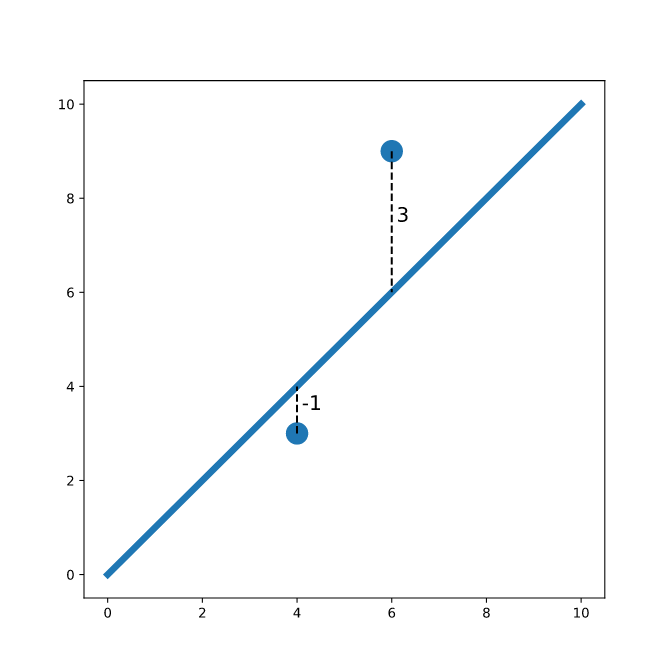

In this plot, we see two points on either side of a line. One of the points is one unit below the line (labeled -1). The other point is three units above the line (labeled 3). The total squared error (loss) is:

In [4]:
loss = (-1)**2 + (3)**2
print(loss)

10


Notice that we square each individual distance so that points below and above the line contribute equally to loss (when we square a negative number, the result is positive). To find the best-fit line, we need to find the slope and intercept of the line that minimizes loss.

## Fitting a Linear Regression Model in Python
There are a number of Python libraries that can be used to fit a linear regression, but in this course, we will use the OLS.from_formula() function from statsmodels.api because it uses simple syntax and provides comprehensive model summaries.

Suppose we have a dataset named body_measurements with columns height and weight. If we want to fit a model that can predict weight based on height, we can create the model as follows:

```python
model = sm.OLS.from_formula('weight ~ height', data = body_measurements)
```

We used the formula 'weight ~ height' because we want to predict weight (it is the outcome variable) using height as a predictor. Then, we can fit the model using .fit():

```python
results = model.fit()
```

Finally, we can inspect a summary of the results using print(results.summary()). For now, we’ll only look at the coefficients using results.params, but the full summary table is useful because it contains other important diagnostic information.

```python
print(results.params)
```

Intercept   -21.67

height        0.50

dtype: float64

This tells us that the best-fit intercept is -21.67, and the best-fit slope is 0.50.

##### Instructions
1.
Using the students dataset that has been loaded in script.py, create a linear regression model that predicts student score using hours_studied as a predictor and save the result as a variable named model.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Fit the model using the .fit() method on model (created in the previous step), and save the fitted model as results.

Checkpoint 3 Passed

Stuck? Get a hint
3.
Print out the model coefficients using either .params.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
students = pd.read_csv('test_data.csv')


ModuleNotFoundError: No module named 'statsmodels'

## Using a Regression Model for Prediction
Suppose that we have a dataset of heights and weights for 100 adults. We fit a linear regression and print the coefficients:

```python
model = sm.OLS.from_formula('weight ~ height', data = body_measurements)
results = model.fit()
print(results.params)

Output:
Intercept   -21.67
height        0.50
dtype: float64
```


This regression allows us to predict the weight of an adult if we know their height. To make a prediction, we need to plug in the intercept and slope to our equation for a line. The equation is:


*weight=0.50∗height−21.67*

To make a prediction, we can plug in any height. For example, we can calculate that the expected weight for a 160cm tall person is 58.33kg:


*weight=0.50∗160−21.67=58.33*

In python, we can calculate this by plugging in values or by accessing the intercept and slope from results.params using their indices (0 and 1, respectively):

```python
print(0.50 * 160 - 21.67) 
# Output: 58.33
 
# OR:
 
print(results.params[1]*160 + results.params[0])
# Output: 58.33
```

We can also do this calculation using the .predict() method on the fitted model. To predict the weight of a 160 cm tall person, we need to first create a new dataset with height equal to 160 as shown below:

```python
newdata = {"height":[160]}
print(results.predict(newdata))

Output:
0      58.33
dtype: float64
```
Note that we get the same result (58.33) as with the other methods; however, it is returned as a data frame.

##### Instructions
1.
In script.py, you’ll see the code (from the previous exercise) to fit a model that predicts test score using hours_studied. Print the coefficients of this model using .params.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Using your model, what is the predicted score for a student who spent 3 hours studying? Save the result as pred_3hr and print it out. Calculate your answer by plugging into the formula for a line (instead of using .predict()).

Checkpoint 3 Passed

Stuck? Get a hint
3.
What is the predicted score for a student who spent 5 hours studying? Use the .predict() method to calculate your answer and save it as pred_5hr, then print it out.


```python
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
students = pd.read_csv('test_data.csv')

# Fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()
```

## Interpreting a Regression Model
Let’s again inspect the output for a regression that predicts weight based on height. The regression line looks something like this:
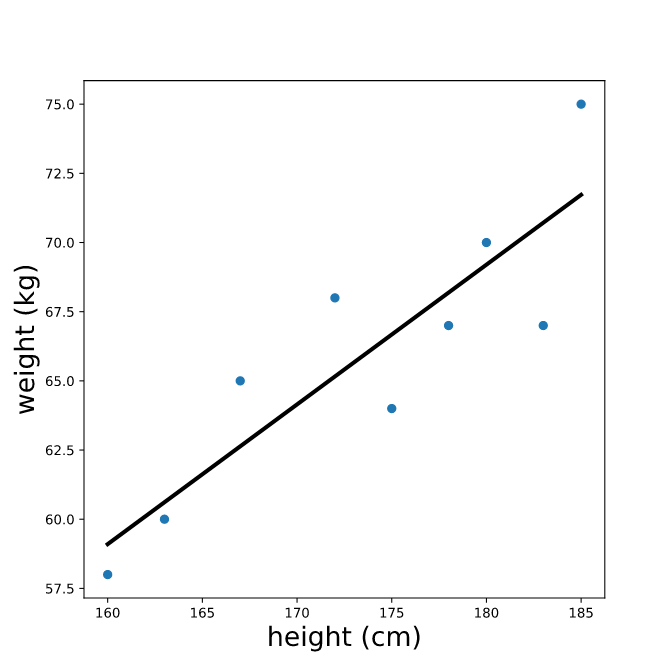

Note that the units of the intercept and slope of a regression line match the units of the original variables; the intercept of this line is measured in kg, and the slope is measured in kg/cm. To make sense of the intercept (which we calculated previously as -21.67 kg), let’s zoom out on this plot:
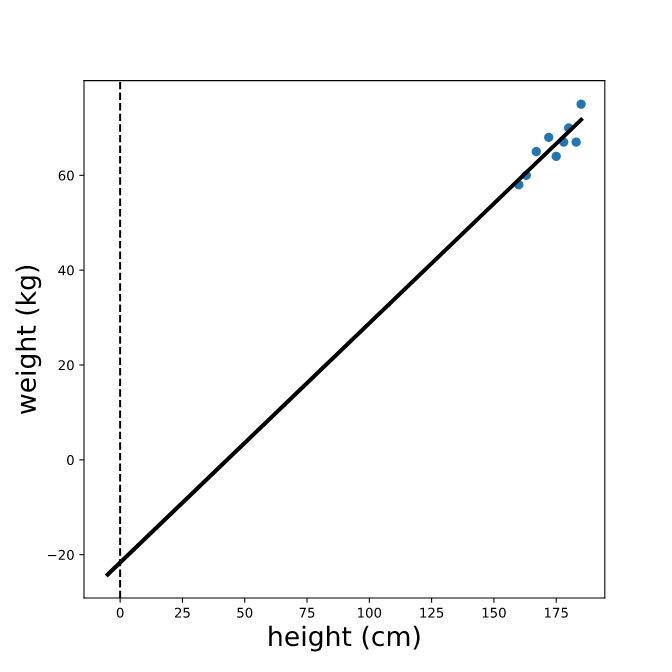
We see that the intercept is the predicted value of the outcome variable (weight) when the predictor variable (height) is equal to zero. In this case, the interpretation of the intercept is that a person who is 0 cm tall is expected to weigh -21 kg. This is pretty non-sensical because it’s impossible for someone to be 0 cm tall!

However, in other cases, this value does make sense and is useful to interpret. For example, if we were predicting ice cream sales based on temperature, the intercept would be the expected sales when the temperature is 0 degrees.

To visualize the slope, let’s zoom in on our plot:
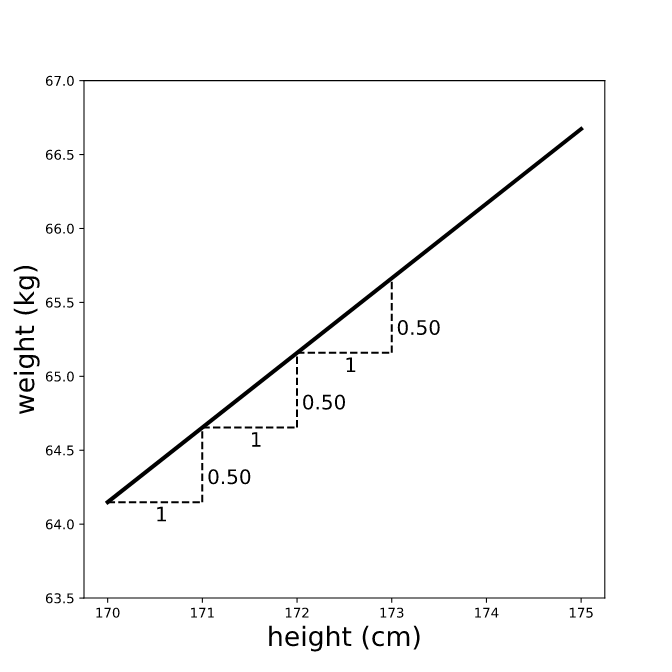
Remember that slope can be thought of as rise/run — the ratio between the vertical and horizontal distances between any two points on the line. Therefore, the slope (which we previously calculated to be 0.50 kg/cm) is the expected difference in the outcome variable (weight) for a one unit difference in the predictor variable (height). In other words, we expect that a one centimeter difference in height is associated with .5 additional kilograms of weight.

Note that the slope gives us two pieces of information: the magnitude AND the direction of the relationship between the x and y variables. For example, suppose we had instead fit a regression of weight with minutes of exercise per day as a predictor — and calculated a slope of -.1. We would interpret this to mean that people who exercise for one additional minute per day are expected to weigh 0.1 kg LESS.

#####
Instructions
1.
Checkpoint: The intercept for the OLS regression model predicting score based on hours_studied is 43. In interpretations.txt give a one-sentence interpretation of the intercept for this model. Does this intercept make sense in real life?

Click Run after you’ve written your interpretation.

Checkpoint 2 Passed

Stuck? Get a hint
2.
The slope for the OLS regression model predicting score based on hours_studied is 9.8. In interpretations.txt give a one-sentence interpretation of the intercept for this model.

Click Run after you’ve written your interpretation.

Interpretation of the intercept:

A student who studied for 0 hours is expected to score a 43 on the test.


Interpretation of the slope:

For every additional 1 hour of studying, students are expected to score 9.8 points higher on the test.

## Assumptions of Linear Regression Part 1
There are a number of assumptions of simple linear regression, which are important to check if you are fitting a linear model. 

The first assumption is that the relationship between the outcome variable and predictor is linear (can be described by a line). We can check this before fitting the regression by simply looking at a plot of the two variables.

The next two assumptions (normality and homoscedasticity) are easier to check after fitting the regression. We will learn more about these assumptions in the following exercises, but first, we need to calculate two things: fitted values and residuals.

Again consider our regression model to predict weight based on height (model formula *'weight ~ height'*). The fitted values are the predicted weights for each person in the dataset that was used to fit the model, while the residuals are the differences between the predicted weight and the true weight for each person. Visually:
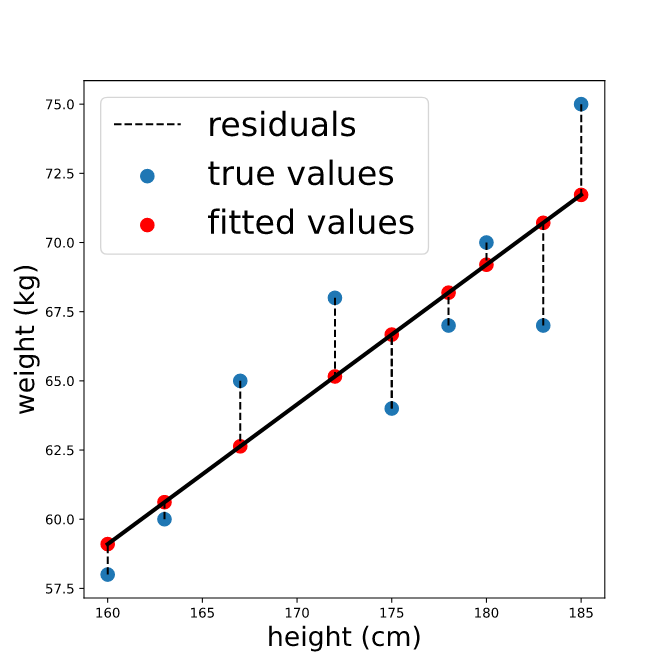

We can calculate the fitted values using .predict() by passing in the original data. The result is a pandas series containing predicted values for each person in the original dataset:

```python
fitted_values = results.predict(body_measurements)
print(fitted_values.head())

Output:
0    66.673077
1    59.100962
2    71.721154
3    70.711538
4    65.158654
dtype: float64
```

The residuals are the differences between each of these fitted values and the true values of the outcome variable. They can be calculated by subtracting the fitted values from the actual values. We can perform this element-wise subtraction in Python by simply subtracting one python series from the other, as shown below:

```python
residuals = body_measurements.weight - fitted_values
print(residuals.head())
Output:

0   -2.673077
1   -1.100962
2    3.278846
3   -3.711538
4    2.841346
dtype: float64
```

#### Instructions
1.
script.py already contains the code to fit a model on the students dataset that predicts test score using hours_studied as a predictor. Calculate the fitted values for this model and save them as fitted_values.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Calculate the residuals for this model and save the result as residuals.

```python
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
students = pd.read_csv('test_data.csv')

# Fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()

# Calculate `fitted_values` here:
fitted_values = results.predict(students)
print(fitted_values.head())
# Calculate `residuals` here:
residuals = students.score - fitted_values
print(residuals.head())
# Print the first 5 residuals here:

```

In [4]:
import statsmodels.api as sm

## Assumptions of Linear Regression Part 2
Once we’ve calculated the fitted values and residuals for a model, we can check the normality and homoscedasticity assumptions of linear regression.

### 2. Normality assumption
The normality assumption states that the residuals should be normally distributed. To check this assumption, we can inspect a histogram of the residuals and make sure that the distribution looks approximately normal (no skew or multiple “humps”):
```python
plt.hist(residuals)
plt.show()
```
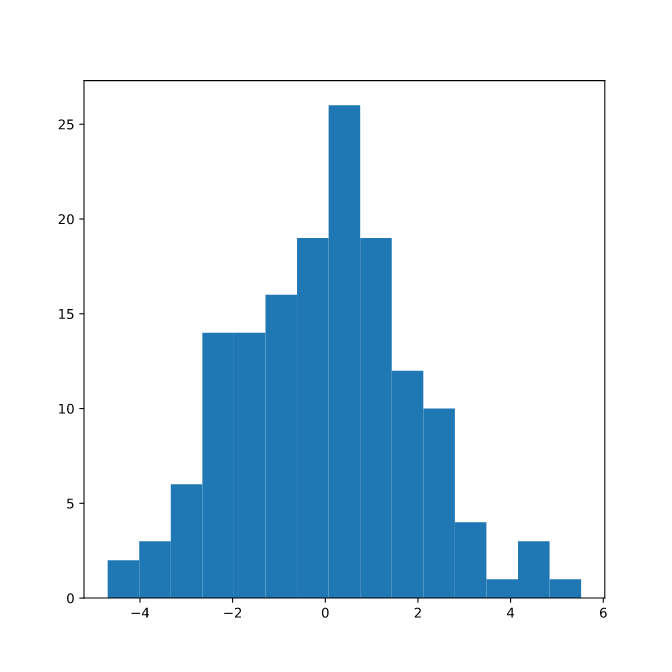
These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.

If the plot instead looked something like the distribution below (which is skewed right), we would be concerned that the normality assumption is not met:
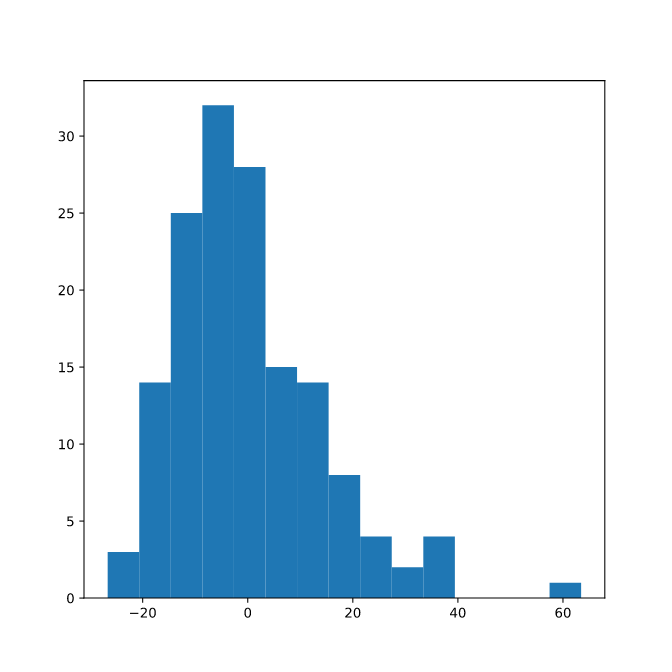

### 3. Homoscedasticity assumption
Homoscedasticity is a fancy way of saying that the residuals have equal variation across all values of the predictor variable. A common way to check this is by plotting the residuals against the fitted values.
```python
plt.scatter(fitted_values, residuals)
plt.show()
```

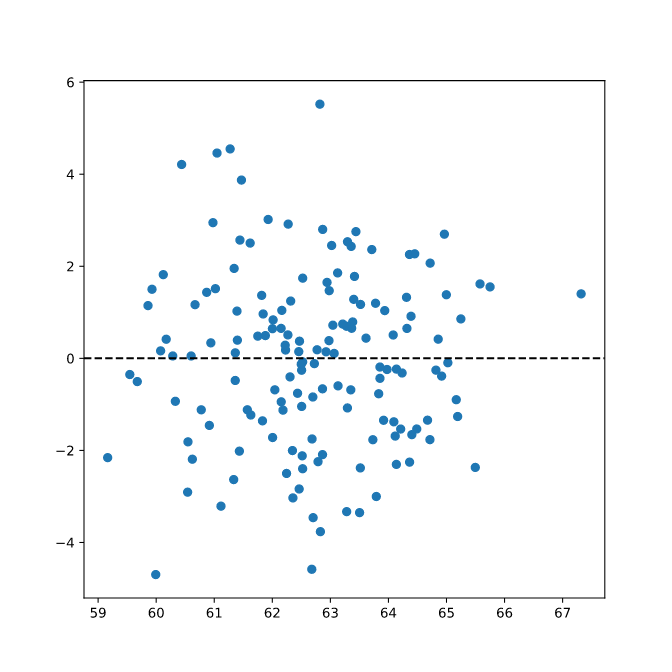

If the homoscedasticity assumption is met, then this plot will look like a random splatter of points, centered around y=0 (as in the example above).

If there are any patterns or asymmetry, that would indicate the assumption is NOT met and linear regression may not be appropriate. For example:

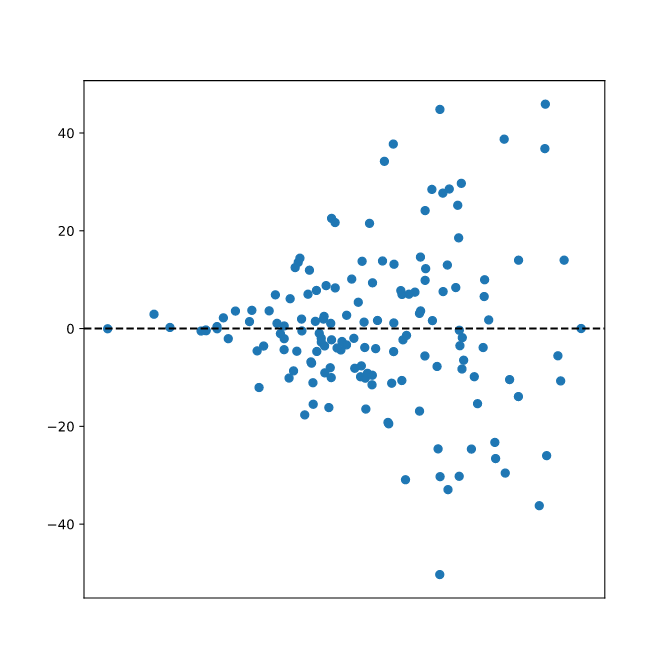


#####
Instructions
1.
Your code to calculate the residuals and fitted values for the model of score predicted by hours studied is provided for you in script.py. Plot a histogram of the residuals to check the normality assumption. Is this assumption met?

Checkpoint 2 Passed

Stuck? Get a hint
2.
Now, check the homoscedasticity assumption by plotting the residuals against the fitted values (fitted_values on the x-axis and residuals on the y-axis). Is this assumption met?

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
students = pd.read_csv('test_data.csv')

# Fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()

# Calculate fitted values
fitted_values = results.predict(students)

# Calculate residuals
residuals = students.score - fitted_values

# Plot a histogram of the residuals here:
plt.hist(residuals)
#plt.show()

plt.show()
plt.clf()

# Plot the residuals against the fitted vals here:
plt.scatter(fitted_values, residuals)

plt.show()
```

## Categorical Predictors
In the previous exercises, we used a quantitative predictor in our linear regression, but it’s important to note that we can also use categorical predictors. The simplest case of a categorical predictor is a binary variable (only two categories).

For example, suppose we surveyed 100 adults and asked them to report their height in cm and whether or not they play basketball. We’ve coded the variable bball_player so that it is equal to 1 if the person plays basketball and 0 if they do not. A plot of height vs. bball_player is below:

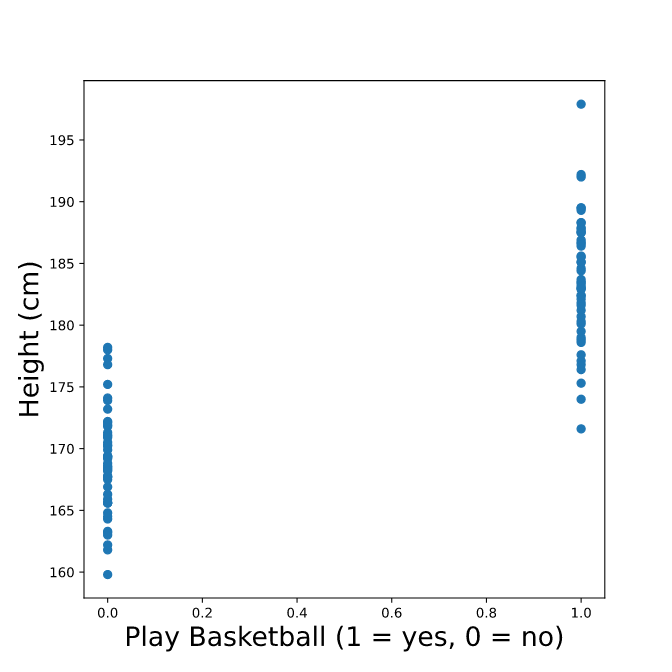

We see that people who play basketball tend to be taller than people who do not. Just like before, we can draw a line to fit these points. Take a moment to think about what that line might look like!

You might have guessed (correctly!) that the best fit line for this plot is the one that goes through the mean height for each group. To re-create the scatter plot with the best fit line, we could use the following code:

```python
# Calculate group means
print(data.groupby('play_bball').mean().height)
Output:

play_bball
0	169.016
1	183.644
# Create scatter plot
plt.scatter(data.play_bball, data.height)
 
# Add the line using calculated group means
plt.plot([0,1], [169.016, 183.644])
 
# Show the plot
plt.show()
```

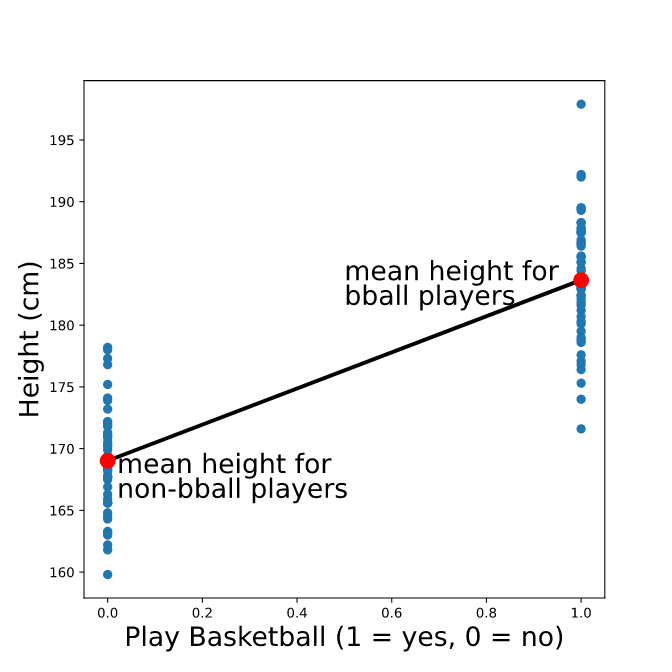



##### Instructions
1.
Using the dataset students (which has been loaded for you in script.py), plot a scatter plot of score (y-axis) against breakfast (x-axis) to see scores for students who did and did not eat breakfast.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Code has been provided for you in script.py to calculate the mean test score for students who ate breakfast and the mean score for students who did not eat breakfast. Use these numbers to plot the best-fit line on top of the scatter plot.

```python
score
0	61.66415094339621
1	73.7212765957447

# Load libraries
import codecademylib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
students = pd.read_csv('test_data.csv')

# Calculate group means
print(students.groupby('breakfast').mean().score)

# Create the scatter plot here:
plt.scatter(students.breakfast, students.score)

# Add the additional line here:
plt.plot([0,1], [61.664, 73.72])

# Show the plot
plt.show()
```


## Categorical Predictors: Fit and Interpretation
Now that we’ve seen what a regression model with a binary predictor looks like visually, we can actually fit the model using statsmodels.api.OLS.from_formula(), the same way we did for a quantitative predictor:
```python
model = sm.OLS.from_formula('height ~ play_bball', data)
results = model.fit()
print(results.params)
Output:

Intercept     169.016
play_bball     14.628
dtype: float64
```
Note that this will work if the play_bball variable is coded with 0s and 1s, but it will also work if it is coded with Trues and Falses, or even if it is coded with strings like 'yes' and 'no' (in this case, the coefficient label will look something like play_bball[T.yes] in the params output, indicating that 'yes' corresponds to a 1).

To interpret this output, we first need to remember that the intercept is the expected value of the outcome variable when the predictor is equal to zero. In this case, the intercept is therefore the mean height of non-basketball players.

The slope is the expected difference in the outcome variable for a one unit difference in the predictor variable. In this case, a one unit difference in play_bball is the difference between not being a basketball player and being a basketball player. Therefore, the slope is the difference in mean heights for basketball players and non-basketball players.

##### Instructions
1.
The students dataset has been loaded for you in script.py. Create and fit a regression model of score predicted by breakfast using sm.OLS.from_formula() and print out the coefficients.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Code has been provided for you in script.py to calculate the mean test score for students who ate breakfast (saved as mean_score_breakfast) and the mean score for students who did not eat breakfast (saved as mean_score_no_breakfast). Calculate and print the difference in mean scores. Can you find how this number relates to the regression output?

```python
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
students = pd.read_csv('test_data.csv')

# Calculate and print group means
mean_score_no_breakfast = np.mean(students.score[students.breakfast == 0])
mean_score_breakfast = np.mean(students.score[students.breakfast == 1])
print('Mean score (no breakfast): ', mean_score_no_breakfast)
print('Mean score (breakfast): ', mean_score_breakfast)

# Fit the model and print the coefficients
model = sm.OLS.from_formula('score~breakfast', data = students)
results = model.fit()
print(results.params)
# Calculate and print the difference in group means
mean_score_difference = mean_score_breakfast - mean_score_no_breakfast
print("Difference between the 2 means in {mean}".format(mean = mean_score_difference))
```

### Review
Congratulations! As a recap, you’ve learned to:

* Fit a simple OLS linear regression model
* Use both quantitative and binary categorical predictors
* Interpret the coefficients of a regression model
* Check the assumptions of a regression model
#### Instructions
A new dataset named website has been loaded for you in the workspace containing simulated data for a sample of visitors to a website, including the amount of time in seconds they spent on the website (time_seconds), their age (age), and information about whether they accessed the website using Chrome or Safari (browser).

Try to work through the following steps (solution code is provided in solution.py). Note that after showing each plot with plt.show(), we’ve included the command plt.clf() in the starting code to ensure that plots are not layered on top of each other.

1. Create a plot of time_seconds (vertical axis) versus age (horizontal axis). Is there a linear relationship between these variables?
2. Fit a linear model to predict time_seconds using the age variable
3. Use the coefficients from the linear model to plot the regression line on top of your original plot.
4. Calculate the fitted values and residuals
5. Check the normality assumption by plotting a histogram of the residuals. Are they approximately normally distributed?
6. Check the homoscedasticity assumption by plotting a the residuals against the fitted values. Is this assumption satisfied?
7. Use your model to predict the amount of time that a 40 year old person will spend on the website.
8. Fit another model that predicts time_seconds based on browser.
9. Print out the coefficients. What is the difference in average time spent on each browser?



In [ ]:
 Load libraries
import codecademylib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
print(website.head())

# Create a scatter plot of time vs age
plt.scatter(website.age, website.time_seconds)

# Show then clear plot
plt.show()
plt.clf()

# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', website)
results = model.fit()
print(results.params)

# Plot the scatter plot with the line on top
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, results.params[0] + results.params[1]*website.age)

# Show then clear plot
plt.show()
plt.clf()

# Calculate fitted values
fitted_values = results.predict(website)

# Calculate residuals
residuals = website.time_seconds - fitted_values

# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Predict amount of time on website for 40 year old
pred40 = results.params[0] + results.params[1]*40
print('predicted time on website for a 40 year old: ', pred40)

# Fit a linear regression to predict time_seconds based on the browser
model = sm.OLS.from_formula('time_seconds ~ browser', website)
results = model.fit()
print(results.params)

# Calculate and print the group means (for comparison)
mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print('Mean time (Chrome): ', mean_time_chrome)
print('Mean time (Safari): ', mean_time_safari)
print('Mean time difference: ', mean_time_chrome - mean_time_safari)